In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv('C:/Users/Thiago/Desktop/DS Python/Potifolio/Calculadora de imoveis/Datasets/Aptos_sem_outliers.csv')

In [3]:
df['crawler'].value_counts()

botafogo           1066
ipanema            1043
cosme_velho        1040
copacabana         1020
leblon              983
flamengo            882
laranjeiras         358
lagoa               330
catete              195
leme                171
glória              153
humaitá             142
gávea               137
jardim_botanico     130
são_conrado          88
urca                 72
Name: crawler, dtype: int64

In [4]:
X = df[["area_limpo", "Banheiro", "Quarto", "condominio", "Garagem"]]
y = df["preço"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [6]:
X.shape

(7810, 5)

In [7]:
X_test.shape

(1562, 5)

In [8]:
y_train

2540    1600.0
7808    5500.0
7112    4000.0
6061    3600.0
5802    2400.0
         ...  
3492    2200.0
2177    5000.0
7453    7100.0
3557    3900.0
4578    2400.0
Name: preço, Length: 6248, dtype: float64

In [9]:
model = LinearRegression(fit_intercept=False)

In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [11]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [12]:
np.mean(np.abs(y_train - y_pred_train)/y_train)

0.44227490785624474

In [13]:
np.mean(np.abs(y_test - y_pred_test)/y_test)

0.4641185203631151

In [14]:
r2_score(y_test, y_pred_test)

0.4754306491796537

In [15]:
knn = KNeighborsRegressor(n_neighbors=5)

In [16]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [17]:
y_pred = knn.predict(X_test)

In [18]:
def mape(y_test, y_pred):
    return np.mean(np.abs((y_test-y_pred)/y_test))

In [19]:
mape(y_test,y_pred)

0.35764451339843834

In [20]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mape(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.30978558706424686
k=3, mape=0.34609760534466516
k=5, mape=0.35764451339843834
k=7, mape=0.3633194618960838
k=9, mape=0.36432095772448064


In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=12345, shuffle=True)

In [24]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mape(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.3663759895618607
k=3, mape=0.36535120523292464
k=5, mape=0.3726027423654004
k=7, mape=0.37959427269213103
k=9, mape=0.37786749531562414


In [25]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [26]:
novo_apto = pd.DataFrame([[60, 4, 2, 500, 1]], columns=X_train.columns)

In [27]:
novo_apto_scaled = scaler.transform(novo_apto)

In [28]:
knn.predict(novo_apto_scaled)

array([5816.66666667])

In [29]:
residuals = y_test - y_pred

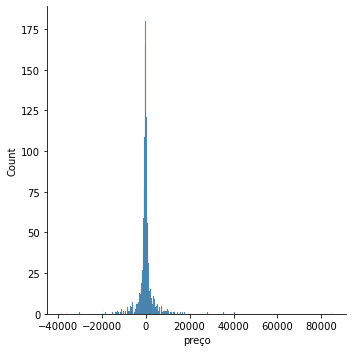

In [30]:
sns.displot(residuals)

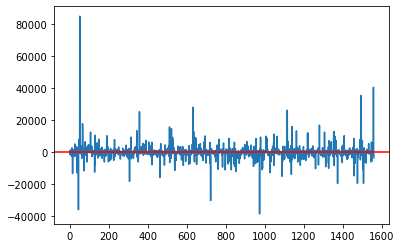

In [31]:
residuals_df = pd.DataFrame(residuals).reset_index(drop=True)
residuals_df["preço"].plot()
plt.axhline(y=0, c="r")

In [32]:
r2_score(y_test, y_pred)

0.5178785291312669

In [33]:
df = pd.read_csv('C:/Users/Thiago/Desktop/DS Python/Potifolio/Calculadora de imoveis/Datasets/Aptos_sem_outliers.csv')
X = df[["area_limpo", "Banheiro", "Quarto", "condominio", "Garagem", "crawler"]]
y = df["preço"]

In [34]:
X = pd.concat((X,pd.get_dummies(X["crawler"])), axis=1).drop(columns=["crawler"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
mape(y_test, y_pred)

0.49451456089020673

-126.20502290598347

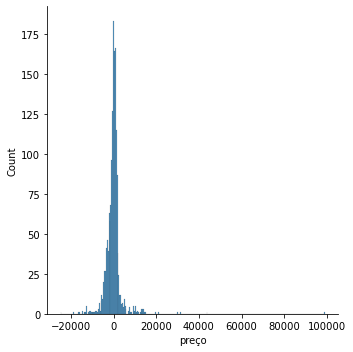

In [37]:
residuals = y_test - y_pred
sns.displot(residuals)
np.mean(residuals)

In [38]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=12345, shuffle=True)

In [40]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mape(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.3378173365811028
k=3, mape=0.30961688450129116
k=5, mape=0.30912324359406457
k=7, mape=0.30733360247095726
k=9, mape=0.30781030711489976


In [41]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
error = mape(y_test, y_pred)
residuals = y_test - y_pred

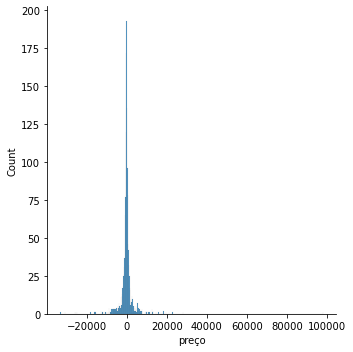

In [42]:
sns.displot(residuals)

In [43]:
r2_score(y_test, y_pred)

0.5776364811214605

In [44]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mape(y_test, y_pred)


0.4443449255440387

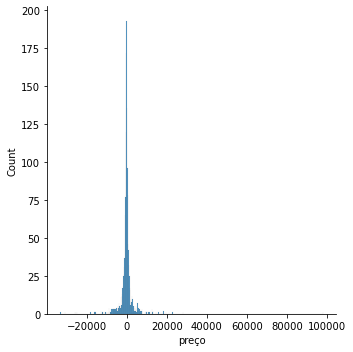

In [45]:
sns.displot(residuals)

In [46]:
r2_score(y_test, y_pred)

0.6944937336336667

In [47]:
df = pd.read_csv('C:/Users/Thiago/Desktop/DS Python/Potifolio/Calculadora de imoveis/Datasets/Aptos_sem_outliers.csv')

In [48]:
X = df[["area_limpo", "Banheiro", "Quarto", "condominio", "Garagem", "crawler"]]
y = df["preço"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345, shuffle=True)

In [51]:
categorical_features = ["crawler"]
cat = CatBoostRegressor(random_state=1234, cat_features=categorical_features, verbose=False)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
mape(y_test, y_pred)
residuals = y_test - y_pred

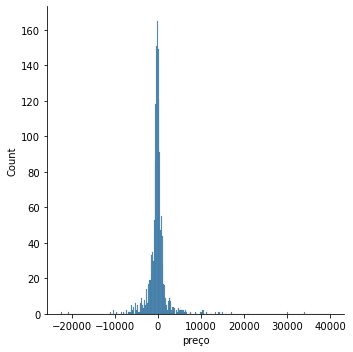

In [52]:
sns.displot(residuals)

In [53]:
r2_score(y_test, y_pred)

0.8045252574599608

In [54]:
cat.save_model('C:/Users/Thiago/Desktop/DS Python/Potifolio/Calculadora de imoveis/Modelo/model_catr.cbm')

In [55]:
model=CatBoostRegressor()
model.load_model('C:/Users/Thiago/Desktop/DS Python/Potifolio/Calculadora de imoveis/Modelo/model_catr.cbm')

In [56]:
["area", "Banheiro", "Quarto", "condominio", "Garagem", "bairro"]

['area', 'Banheiro', 'Quarto', 'condominio', 'Garagem', 'bairro']

In [62]:
apto = [20,1,1,500,1,'Botafogo']

In [63]:
model.predict(apto)

1594.3258017342828